In [1]:
import tensorflow as tf

/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

W0826 11:35:37.713287 4575040960 deprecation.py:323] From <ipython-input-3-eef628746518>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0826 11:35:37.714606 4575040960 deprecation.py:323] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0826 11:35:37.716536 4575040960 deprecation.py:323] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future versi

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz


W0826 11:35:37.961621 4575040960 deprecation.py:323] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.num_examples

10000

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

In [14]:
mnist.train.images[1].shape

(784,)

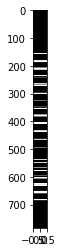

In [19]:
plt.imshow(mnist.train.images[1].reshape(784, 1),
           cmap = 'gist_gray', aspect = 0.02)

In [20]:
x = tf.placeholder(tf.float32, shape = [None, 784])

In [21]:
W = tf.Variable(tf.zeros([784, 10]))

In [24]:
b = tf.Variable(tf.zeros([10]))

In [25]:
y = tf.matmul(x, W) + b

In [26]:
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [27]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
labels = y_true, logits = y))

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)

In [29]:
train = optimizer.minimize(cross_entropy)

In [30]:
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict = {x: batch_x, y_true: batch_y})
        
    matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    
    print(sess.run(acc, feed_dict = {x: mnist.test.images, y_true: mnist.test.labels}))
    
    

0.9178
